In [2]:
function G(n, j, t)
    val = 0
    if n == 0 && j == 0
        val = t
    elseif n ≥ 1 && (0 ≤ j ≤ 2^(n-1)-1) 
        if 0 ≤ t < j / (2^(n - 1))
            val = 0
        elseif j / (2^(n - 1)) ≤ t < (j + 0.5) / (2^(n - 1))
            val = 2^((n - 1) / 2) * (t - j / (2^(n - 1)))
        elseif (j + 0.5) / (2^(n - 1)) ≤ t < (j + 1) / (2^(n - 1))
            val = 2^((n - 1) / 2) * ((j + 1) / (2^(n - 1)) - t)
        else
            val = 0
        end
    end
    return val
end

G (generic function with 1 method)

In [3]:
# generate std. normal r.v.s
N = 10 # number of terms 
M = 100 # number of realizations
y = Vector{Vector{Vector{Float64}}}(undef, N)
for n = 0:N-1
    if n == 0
        y[n+1] = Vector{Vector{Float64}}(undef, 1)
        y[n+1][1] = randn(M)
    elseif n ≥ 1
        y[n+1] = Vector{Vector{Float64}}(undef, 2^(n - 1))
        for j = 0:2^(n-1)-1
            y[n+1][j+1] = randn(M)
        end
    end
end

In [4]:
dt = 0.01
ts = collect(0:dt:1.0)
nts = length(ts)
fs = zeros(N, nts, M)
for n = 0:N-1
    for i = 1:nts
        if n == 0
            fs[n+1, i, :] = y[n+1][1] .* G(n, 0, ts[i])
        elseif n ≥ 1
            for j = 0:2^(n-1)-1
                fs[n+1, i, :] += y[n+1][j+1] * G(n, j, ts[i])
            end
        end
    end
end

In [5]:
W = zeros(nts,M)
for i = 1 : nts
    for n = 0 : N-1
        W[i,:] += fs[n+1,i,:]
    end
end

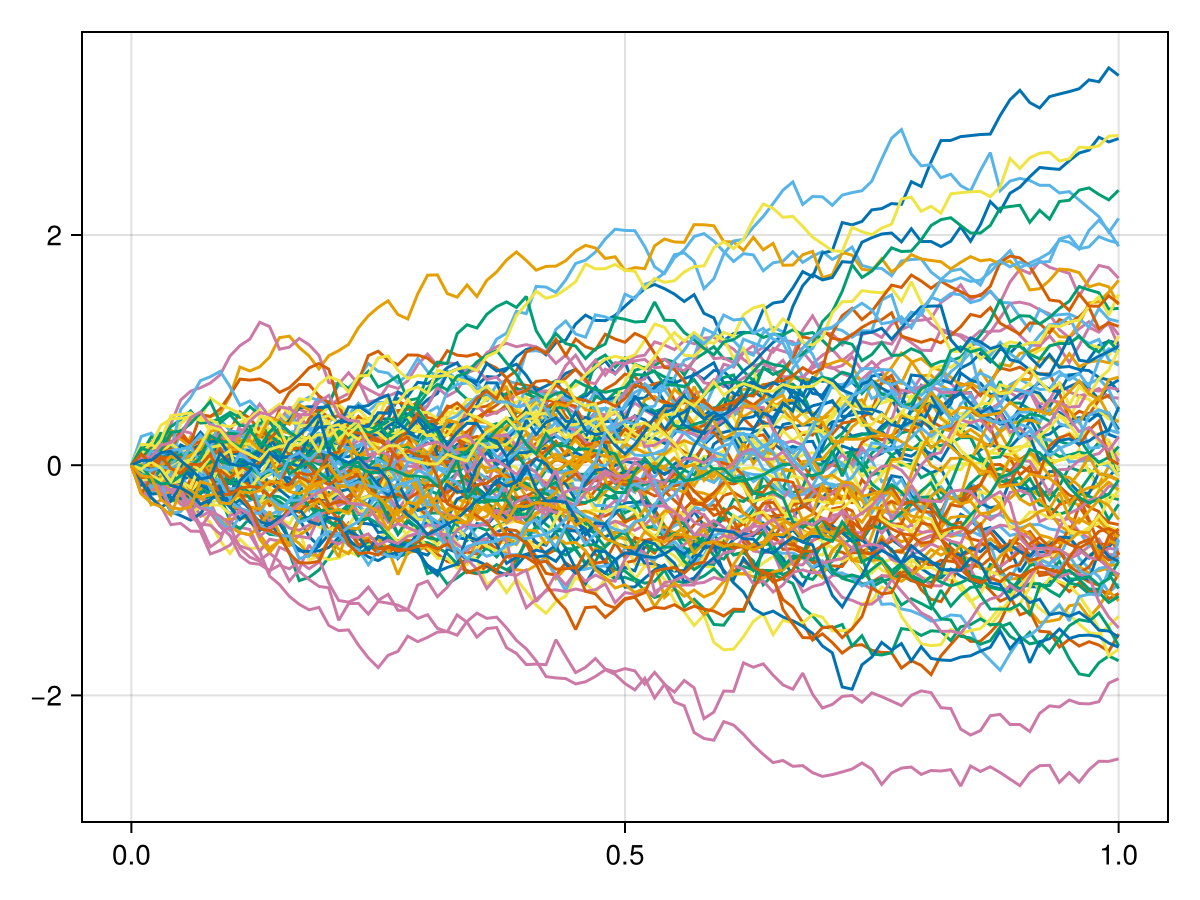

In [6]:
using CairoMakie
f = Figure()
ax = Axis(f[1,1])
for i = 1 : M
    lines!(ax,ts,W[:,i])
end
f

In [7]:
# Langevin equation
α = 0.1
β = 0.01
X₀ = 0
# solution
# Xₜ = exp(-βt)(exp(βt)*B_t - ∫₀ᵗB_tβexp(βt)dt
# Xₜ = B_t - exp(-βt)∫₀ᵗB_t β exp(βt) dt
X = zeros(nts,M)
for i = 1 : M
    for j = 2 : nts
        X[j,i] = W[j,i] - dt*β*exp(-β*ts[j])*sum(W[1:j,i].*exp.(β*ts[1:j]))
    end
end


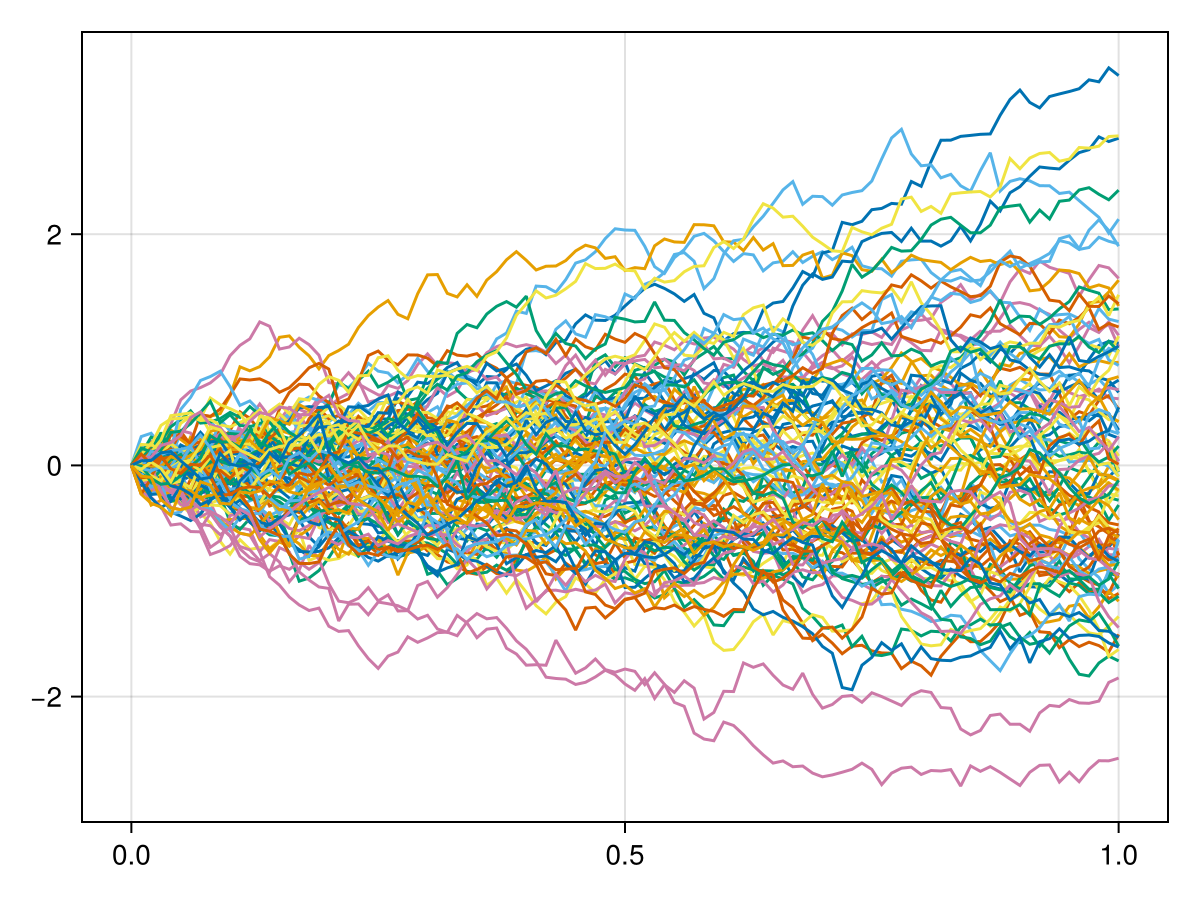

In [8]:
using CairoMakie
f = Figure()
ax = Axis(f[1,1])
for i = 1 : M
    lines!(ax,ts,X[:,i])
end
f

In [9]:
# geometric brownian motion
X = ones(nts,M)
μ = 0.1
σ = 0.2
for i = 1 : M
    for j = 1 : nts
        X[j,i] = exp( (μ - 0.5*σ^2)*ts[j] + σ*W[j,i] )
    end
end

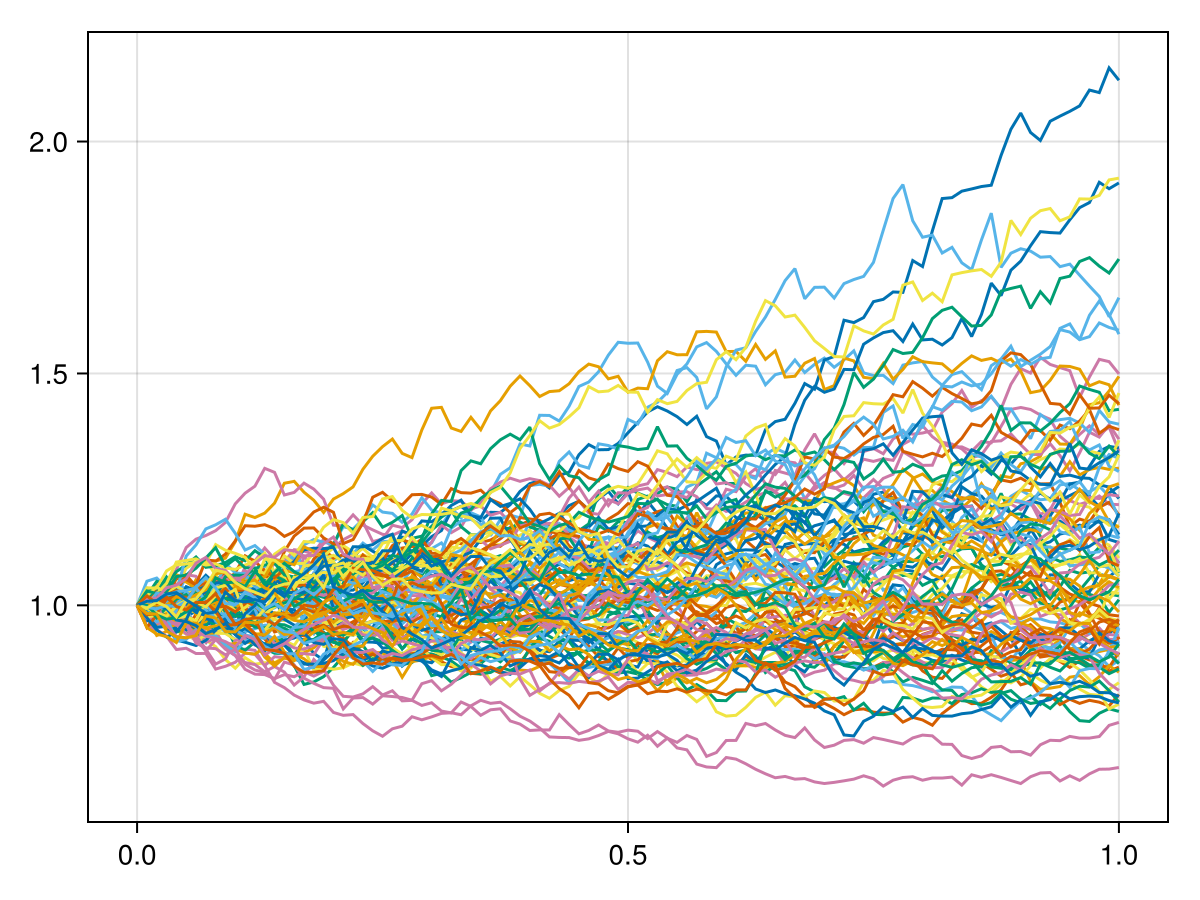

In [10]:
using CairoMakie
f = Figure()
ax = Axis(f[1,1])
for i = 1 : M
    lines!(ax,ts,X[:,i])
end
f

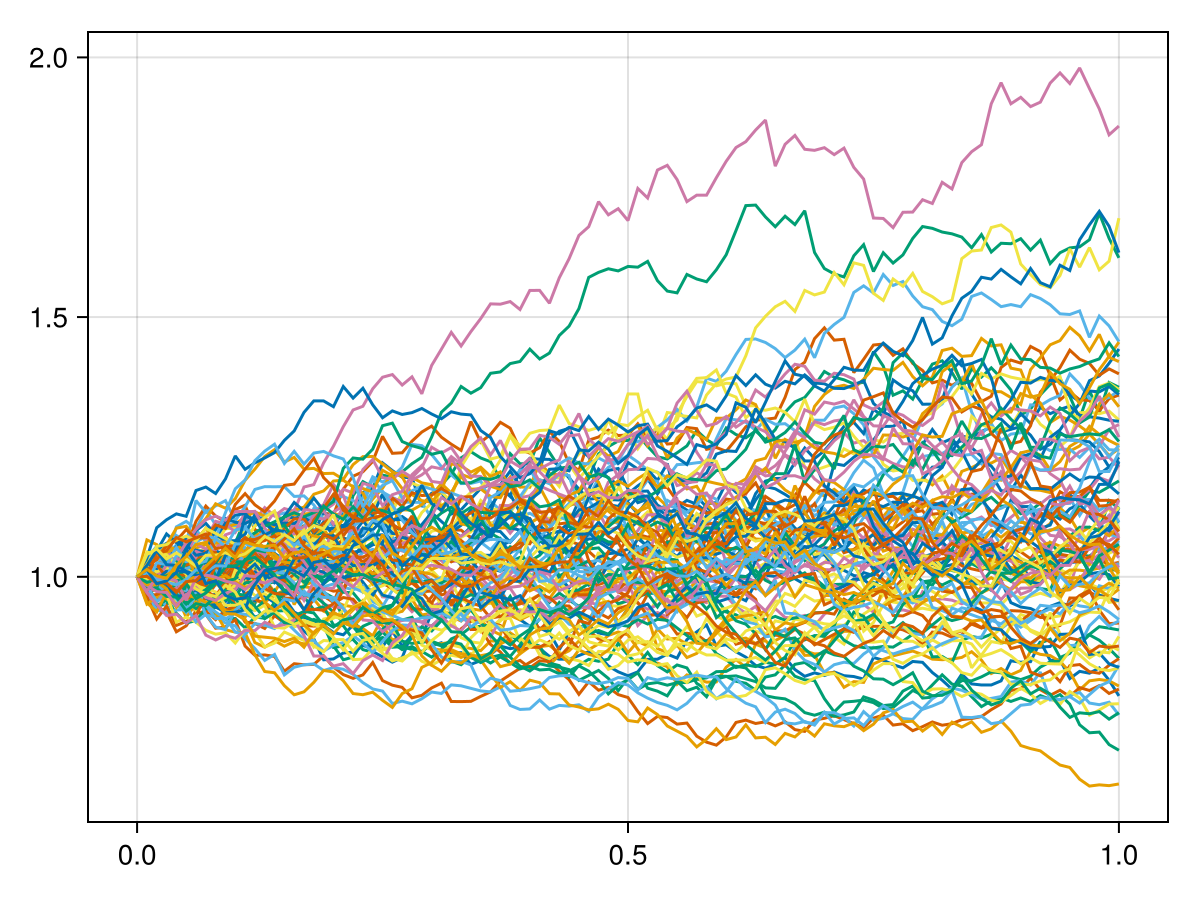

In [16]:
# GBM simulation, Euler-Maruyama
X = ones(nts,M)
for i = 1 : M
    for j = 2 : nts
        X[j,i] = X[j-1,i] + μ*X[j-1,i]*dt + σ*X[j-1,i]*sqrt(dt)*randn()
    end
end

using CairoMakie
f = Figure()
ax = Axis(f[1,1])
for i = 1 : M
    lines!(ax,ts,X[:,i])
end
f